# LUME-Genesis example

In [7]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# Nicer plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (20,6)

In [9]:
from genesis import Genesis
import numpy as np
import os

# Genesis binary
if 'GENESIS_BIN' not in os.environ:
    os.environ['GENESIS_BIN'] = os.path.expandvars('$HOME/cori/genesis/bin/genesis2')
    
WORKDIR='/global/cscratch1/sd/cmayes/test_jacek1'

In [10]:
!rm -rf {WORKDIR}
!mkdir {WORKDIR}

# Setup Genesis object and write basic input

In [11]:
# Make genesis object with default input
G = Genesis('hxr_cutbeam9_5keV02invL.in', verbose=True, use_tempdir=False, workdir=WORKDIR)

# Turn on field output
G['idmpfld'] = 1

# Turn on particle output
G['idmppar'] = 1

# Write input
G.write_input()

Parsed beam file: /global/u2/c/cmayes/test/test_jacek/curr_cutCM02.txt with 14 columns
loading lattice:  /global/u2/c/cmayes/test/test_jacek/lcls2_hxr_SASE_inv.lat
Configured to run in: /global/cscratch1/sd/cmayes/test_jacek1
Beam written: /global/cscratch1/sd/cmayes/test_jacek1/genesis_beam.in
/global/cscratch1/sd/cmayes/test_jacek1 genesis_lattice.in
Lattice written: /global/cscratch1/sd/cmayes/test_jacek1/genesis_lattice.in


# Run at Cori

This will use an interactive session. This will take a few minutes.

In [12]:
!cd {WORKDIR};salloc -N 4 -C haswell -q interactive -t 00:30:00 srun -n 128 ~/cori/genesis/bin/genesis2_mpi_fastcat genesis.in >log.txt;tail log.txt

salloc: Granted job allocation 30828381
salloc: Waiting for resource configuration
salloc: Nodes nid00[124-127] are ready for job
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are 

# Load that output and archive

In [13]:
G.load_output()

Loaded output: /global/cscratch1/sd/cmayes/test_jacek1/hxr_cut9_5keVTaper4_5.out
Loaded dfl: /global/cscratch1/sd/cmayes/test_jacek1/hxr_cut9_5keVTaper4_5.out.dfl
Loaded dpa: /global/cscratch1/sd/cmayes/test_jacek1/hxr_cut9_5keVTaper4_5.out.dpa


In [17]:
G.output['data']['dpa'].shape

(498, 6, 16384)

In [25]:
sf = G.output['data']['dpa'][100, :, :]

In [26]:
##. 0      1.    2. 3.  4.     5
## gamma, phase, x, y, px/mc, py/mc

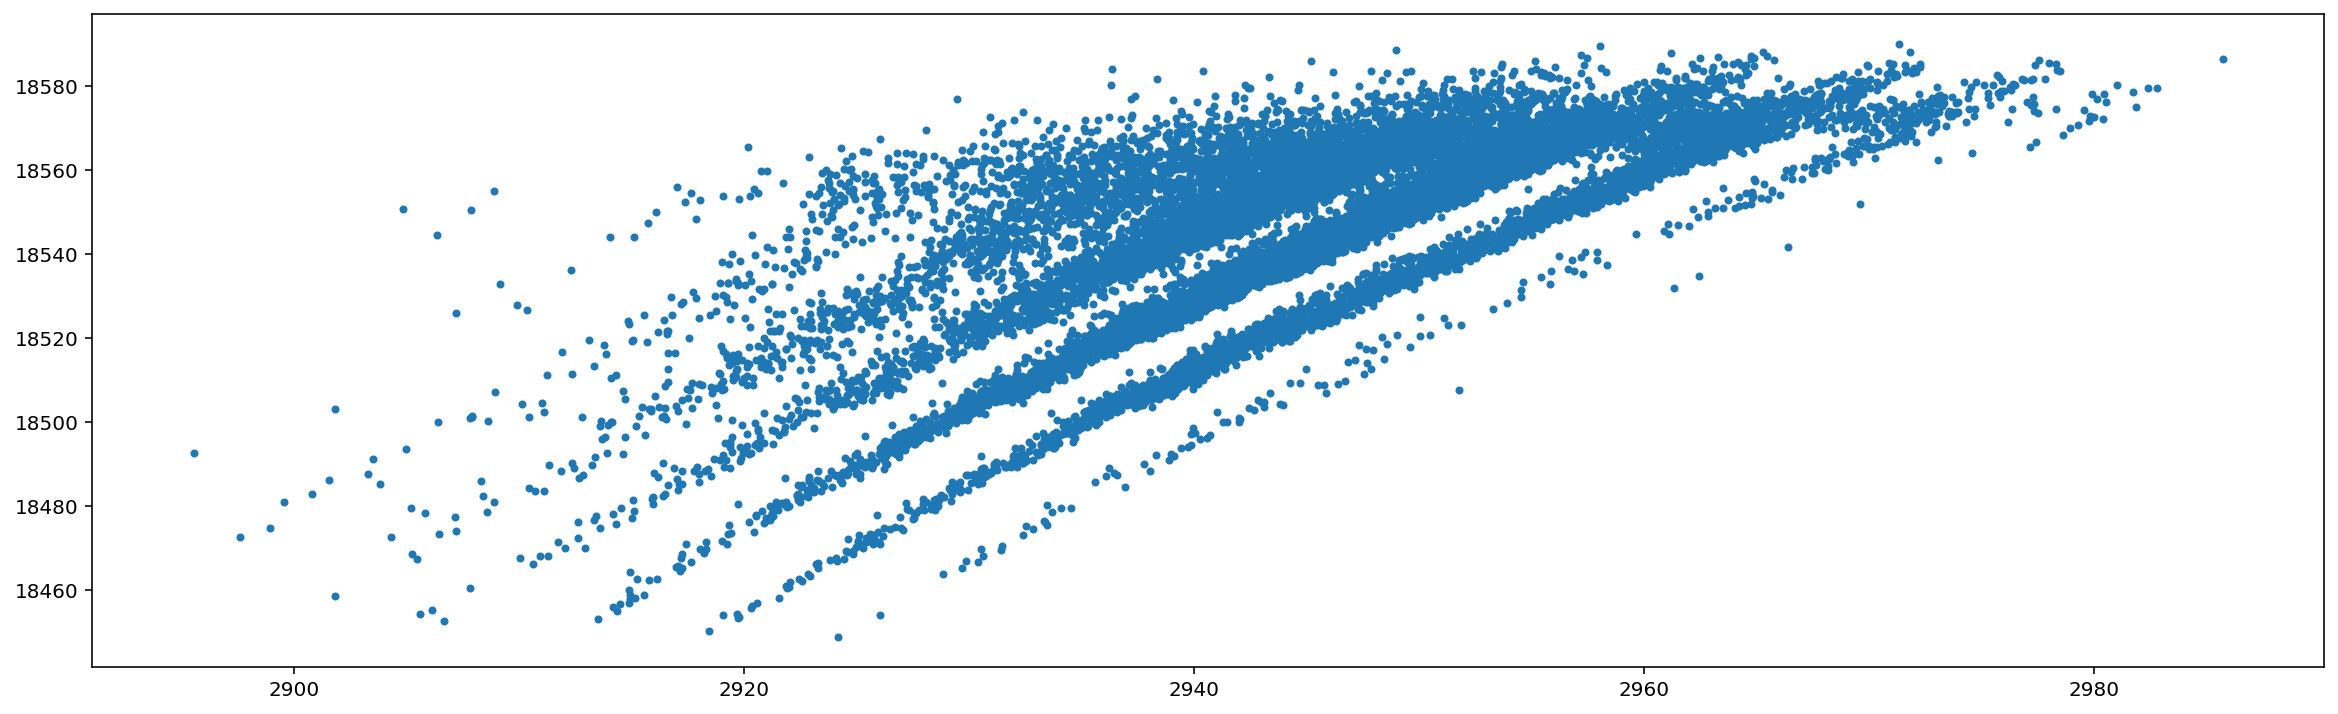

In [29]:
plt.scatter(sf[1, :], sf[0, :], marker='.')

In [ ]:
G.archive()

# Write wavefront

In [30]:
G.write_wavefront()

Writing wavefront (dfl data) to file genesis_wavefront_240db43117c44d363f6b57a21a0606ff.h5


'genesis_wavefront_240db43117c44d363f6b57a21a0606ff.h5'

In [ ]:
AWlist = [ele['strength'] for ele in G.lattice['eles'] if ele['type'] == 'AW']

In [ ]:
def set_aw(lattice, awlist):
    for ele in lattice['eles']:
        if ele

# Plot some output

In [ ]:
G.output['data']['power'].shape

In [ ]:
# Power of all slices, final z position
plt.plot(G.output['data']['power'][:, -1])

In [ ]:
# Visualize some output data
for k in G.output['data']:
    dat = G.output['data'][k]
    
    # Skip the 1D arrays (current, z, aw, q)
    if len(dat.shape) != 2:
        print('skipping', k)
        continue
    plt.title(k)
    plt.xlabel('z index')
    plt.ylabel('slice index')
    plt.imshow(dat, origin='lower')
    plt.show()

# Raw Field

In [ ]:
dat = G.output['data']['dfl']
dat.shape